In [1]:
import pandas as pd
import json
import os
import statsmodels.api as sm

In [2]:
os.chdir('/Users/HELoz/Downloads')

In [3]:
# Reading the json as a dict
with open('es_sentiment.json') as json_data:
    data = json.load(json_data)

In [4]:
# using the from_dict load function. Note that the 'orient' parameter 
#is not using the default value (or it will give the same error that you got before)
# We transpose the resulting df and set index column as its index to get this result
df = pd.DataFrame.from_dict(data, orient='index')
df

,0,1,2,3,4,5,6,7,8,9,...,3793,3794,3795,3796,3797,3798,3799,3800,3801,3802
070 Shake,"{'time': '2020-09-21T22:55:33Z', 'sentiment': ...","{'time': '2020-09-21T22:56:17Z', 'sentiment': ...","{'time': '2020-09-21T22:57:00Z', 'sentiment': ...","{'time': '2020-09-21T22:57:56Z', 'sentiment': ...","{'time': '2020-09-21T22:58:56Z', 'sentiment': ...","{'time': '2020-09-21T23:02:13Z', 'sentiment': ...","{'time': '2020-09-21T23:05:35Z', 'sentiment': ...","{'time': '2020-09-21T23:05:48Z', 'sentiment': ...","{'time': '2020-09-22T20:06:30Z', 'sentiment': ...","{'time': '2020-10-23T10:48:57Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
A Star Is Born (banda sonora),"{'time': '2018-09-16T23:48:15Z', 'sentiment': ...","{'time': '2018-09-29T23:53:45Z', 'sentiment': ...","{'time': '2018-09-29T23:54:20Z', 'sentiment': ...","{'time': '2018-09-30T00:00:00Z', 'sentiment': ...","{'time': '2018-10-04T23:55:49Z', 'sentiment': ...","{'time': '2018-10-06T12:34:39Z', 'sentiment': ...","{'time': '2018-10-06T13:06:53Z', 'sentiment': ...","{'time': '2018-10-07T00:01:07Z', 'sentiment': ...","{'time': '2018-10-09T13:59:54Z', 'sentiment': ...","{'time': '2018-10-09T14:01:04Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
A. J. Applegate,"{'time': '2016-07-07T16:41:33Z', 'sentiment': ...","{'time': '2016-07-07T16:50:16Z', 'sentiment': ...","{'time': '2016-07-07T16:51:48Z', 'sentiment': ...","{'time': '2016-07-07T16:53:44Z', 'sentiment': ...","{'time': '2016-07-07T16:55:49Z', 'sentiment': ...","{'time': '2016-07-07T16:59:43Z', 'sentiment': ...","{'time': '2016-07-07T17:00:17Z', 'sentiment': ...","{'time': '2016-07-07T17:00:20Z', 'sentiment': ...","{'time': '2016-07-07T17:02:15Z', 'sentiment': ...","{'time': '2016-07-07T17:07:36Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Aal de Dragonder,"{'time': '2020-04-10T13:10:00Z', 'sentiment': ...","{'time': '2020-04-10T13:11:16Z', 'sentiment': ...","{'time': '2020-04-10T14:20:14Z', 'sentiment': ...",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Aaron Copland,"{'time': '2004-03-29T21:48:00Z', 'sentiment': ...","{'time': '2004-03-29T21:50:25Z', 'sentiment': ...","{'time': '2004-03-29T21:51:26Z', 'sentiment': ...","{'time': '2004-03-29T21:52:30Z', 'sentiment': ...","{'time': '2004-03-29T21:53:51Z', 'sentiment': ...","{'time': '2004-03-29T21:54:08Z', 'sentiment': ...","{'time': '2004-03-29T21:55:20Z', 'sentiment': ...","{'time': '2004-03-29T23:42:10Z', 'sentiment': ...","{'time': '2004-03-29T23:42:43Z', 'sentiment': ...","{'time': '2004-04-24T14:34:44Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ángel Garó,"{'time': '2007-03-23T07:32:41Z', 'sentiment': ...","{'time': '2007-03-23T18:37:15Z', 'sentiment': ...","{'time': '2007-03-30T11:58:46Z', 'sentiment': ...","{'time': '2007-04-17T10:25:47Z', 'sentiment': ...","{'time': '2007-04-17T11:30:15Z', 'sentiment': ...","{'time': '2007-04-22T18:47:22Z', 'sentiment': ...","{'time': '2007-05-06T18:48:17Z', 'sentiment': ...","{'time': '2007-07-20T22:28:20Z', 'sentiment': ...","{'time': '2007-08-14T01:06:16Z', 'sentiment': ...","{'time': '2007-08-14T01:06:37Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Ángel Pavlovsky,"{'time': '2011-07-16T09:20:54Z', 'sentiment': ...","{'time': '2011-07-16T09:21:06Z', 'sentiment': ...","{'time': '2011-07-16T09:21:41Z', 'sentiment': ...","{'time': '2011-07-16T09:22:43Z', 'sentiment': ...","{'time': '2011-07-16T09:26:59Z', 'sentiment': ...","{'time': '2011-07-16T09:27:14Z', 'sentiment': ...","{'time': '2011-07-16T09:31:04Z', 'sentiment': ...","{'time': '2011-07-16T09:49:36Z', 'sentiment': ...","{'time': '2011-07-16T09:50:02Z', 'sentiment': ...","{'time': '2011-07-16T09:50:29Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Ángeles Álvarez,"{'time': '2011-12

In [5]:
def to_year(string):
    year = string[0:4]
    return int(year)

In [6]:
def to_dataframe(df):
    dflist = []
    for i in range(len(df)):
        mini = df.iloc[i].dropna()
        time = []
        sentiment = []
        for j in range(len(mini)):
            time.append(mini[j]['time'])
            sentiment.append(mini[j]['sentiment'])
        dfn = pd.DataFrame({'time': time, 'sentiment': sentiment})
        dfn['time'] = dfn['time'].apply(to_year)
        dfn = (
            dfn.groupby('time')['sentiment']
            .agg(["mean", "median"])
            .reset_index()
            .rename(columns={
                "time": "year", 
                "mean": "avg_sentiment", 
                "median": "med_sentiment"
            })
        )
        dfn['article name'] = mini.name
        dflist.append(dfn)
    new_df = pd.concat(dflist, ignore_index=True)
    return new_df

In [7]:
new_df = to_dataframe(df)
new_df

,year,avg_sentiment,med_sentiment,article name
0,2020,0.087078,0.004626,070 Shake
1,2018,0.077079,0.058105,A Star Is Born (banda sonora)
2,2019,0.268162,0.059324,A Star Is Born (banda sonora)
3,2020,0.520899,0.520268,A Star Is Born (banda sonora)
4,2021,0.511271,0.509986,A Star Is Born (banda sonora)
...,...,...,...,...
8223,2017,0.700709,0.696219,Óscar Esquivias
8224,2018,0.781360,0.791377,Óscar Esquivias
8225,2019,0.773392,0.771330,Óscar Esquivias
8226,2020,0.823398,0.823254,Óscar Esquivias


In [8]:
dum = pd.get_dummies(new_df['article name'], drop_first=True)
dum

,A Star Is Born (banda sonora),A. J. Applegate,Aal de Dragonder,Aaron Copland,Aaron Yan,Abelardo Estorino,Abraham Ángel,Adam Shankman,Adela Hernández,Adore Delano,...,Yuricon,Yurikuma Arashi,YuruYuri,Zanele Muholi,Ángel Garó,Ángel Pavlovsky,Ángel de Brito,Ángeles Álvarez,Émilienne d'Alençon,Óscar Esquivias
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
new_df = new_df.join(dum).drop('article name', axis=1)
new_df

,year,avg_sentiment,med_sentiment,A Star Is Born (banda sonora),A. J. Applegate,Aal de Dragonder,Aaron Copland,Aaron Yan,Abelardo Estorino,Abraham Ángel,...,Yuricon,Yurikuma Arashi,YuruYuri,Zanele Muholi,Ángel Garó,Ángel Pavlovsky,Ángel de Brito,Ángeles Álvarez,Émilienne d'Alençon,Óscar Esquivias
0,2020,0.087078,0.004626,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,0.077079,0.058105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,0.268162,0.059324,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,0.520899,0.520268,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,0.511271,0.509986,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,2017,0.700709,0.696219,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8224,2018,0.781360,0.791377,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8225,2019,0.773392,0.771330,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8226,2020,0.823398,0.823254,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
cols = list(new_df.columns)
cols.remove('avg_sentiment')
cols.remove('med_sentiment')

In [11]:
cols

['year',
 'A Star Is Born (banda sonora)',
 'A. J. Applegate',
 'Aal de Dragonder',
 'Aaron Copland',
 'Aaron Yan',
 'Abelardo Estorino',
 'Abraham Ángel',
 'Adam Shankman',
 'Adela Hernández',
 'Adore Delano',
 'Aiden Shaw',
 'Aileen Wuornos',
 'Aiza Seguerra',
 'Akuma no Riddle',
 'Al faro',
 'Alan Duncan',
 'Alan Scott',
 'Alan Turing',
 'Aldo Braibanti',
 'Aldo Busi',
 'Alecs Recher',
 'Alejandra Bogue',
 'Alejandra Borrero',
 'Alejandra González Pino',
 'Alex Newell',
 'Alexander James Adams',
 'Alexandra Lacrabère',
 'Alexandre Frota',
 'Alexis Arquette',
 'Alfonso Dosal',
 'Alfred Douglas',
 'Ali Saleem',
 'Alice B. Toklas',
 'Alice Weidel',
 'Alicia Bridges',
 'Alison DiLaurentis',
 'Alison Van Uytvanck',
 'Allá cuelga mi vestido o New York',
 'Altersexo',
 'Amanda Bearse',
 'Amandla Stenberg',
 'Amaranta Gómez Regalado',
 'Amelio Robles Ávila',
 'Amy Daly',
 'Amy Lowell',
 'Ana Irma Rivera Lassén',
 'Anarquismo LGBT',
 'Anaïs Nin',
 'Anderson Cooper',
 'Andrea James',
 'Andrea

In [12]:
Y = new_df['avg_sentiment']
X = new_df[cols]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
p = results.params

In [13]:
Y2 = new_df['med_sentiment']
model2 = sm.OLS(Y2,X)
results2 = model2.fit()
p2 = results2.params

In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          avg_sentiment   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     52.79
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:30:02   Log-Likelihood:                 7581.3
No. Observations:                8228   AIC:                        -1.320e+04
Df Residuals:                    7245   BIC:                            -6301.
Df Model:                         982                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [15]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          med_sentiment   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     48.42
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:30:02   Log-Likelihood:                 7138.0
No. Observations:                8228   AIC:                        -1.231e+04
Df Residuals:                    7245   BIC:                            -5414.
Df Model:                         982                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [16]:
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

In [17]:
ax = new_df.plot(x='year', y='avg_sentiment', kind='scatter')
ax.plot(X, p.const + p.year * X)
ax.set_xlim([2000, 2022])
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_ylim([round(new_df['avg_sentiment'].min()-0.1, 1), round(new_df['avg_sentiment'].max()+0.1, 1)])
fig = ax.get_figure()
#fig.savefig('English Results - Mean.png')

MemoryError: Unable to allocate 61.7 MiB for an array with shape (983, 8228) and data type float64

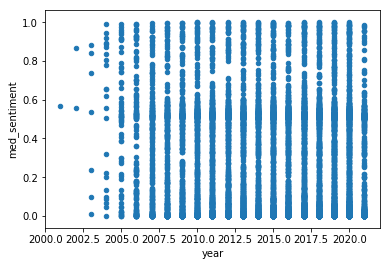

In [22]:
ax2 = new_df.plot(x='year', y='med_sentiment', kind='scatter')
ax2.plot(X, p2.const + p2.year * X)
ax2.xaxis.set_major_locator(years)
ax2.set_xlim([2000, 2022])
ax2.set_ylim([round(new_df['med_sentiment'].min()-0.1, 1), round(new_df['med_sentiment'].max()+0.1, 1)])
fig2 = ax2.get_figure()
#fig.savefig('English Results - Median.png')